In [660]:
# importing liraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [661]:
# importing csv file
data = pd.read_csv("day.csv")

In [662]:
# seeing the first 5 rows of the dataframe
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [663]:
# checking dimentsions of dataframe
data.shape

(730, 16)

In [664]:
# Checking all columns present in dataframe
data.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'], dtype=object)

In [665]:
# describing dataframe
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [666]:
# getting information about each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


=========================================

No null values in whole dataframe which is a good thing.

We can drop "instant" and "dteday" columns as "instant" contains just serial numbers and "dteday" information has already been extracted in "yr","month","weekday" columns.

We can also drop "casual" and "registered" columns as dependent variable "cnt" depends on the sum of them and they are not needed for linear regression.

In [667]:
# dropping instant,dteday,casual and registered columns
data = data.drop(["instant","dteday","casual","registered"],axis=1)

In [668]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [669]:
data.shape

(730, 12)

Now we are left with 12 columns where 11 columns are independent and 1 column is dependent variable.

In [670]:
data.columns.values

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype=object)

## Encoding some columns to make them categorical

In [671]:
# Converting "weathersit" column to categorical variable
data["weathersit"] = data[["weathersit"]].apply(lambda x: x.map({1:"clear",2:"Mist",3:"LightRain",4:"HeavyRain"}))

In [672]:
# Converting "Season" column to categorical variable
data["season"] = data[["season"]].apply(lambda x: x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))

In [673]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Not making "mnth" and "weekday" to categorical data as will be applying cyclical encoding on these 2 columns.

# Visualizing data

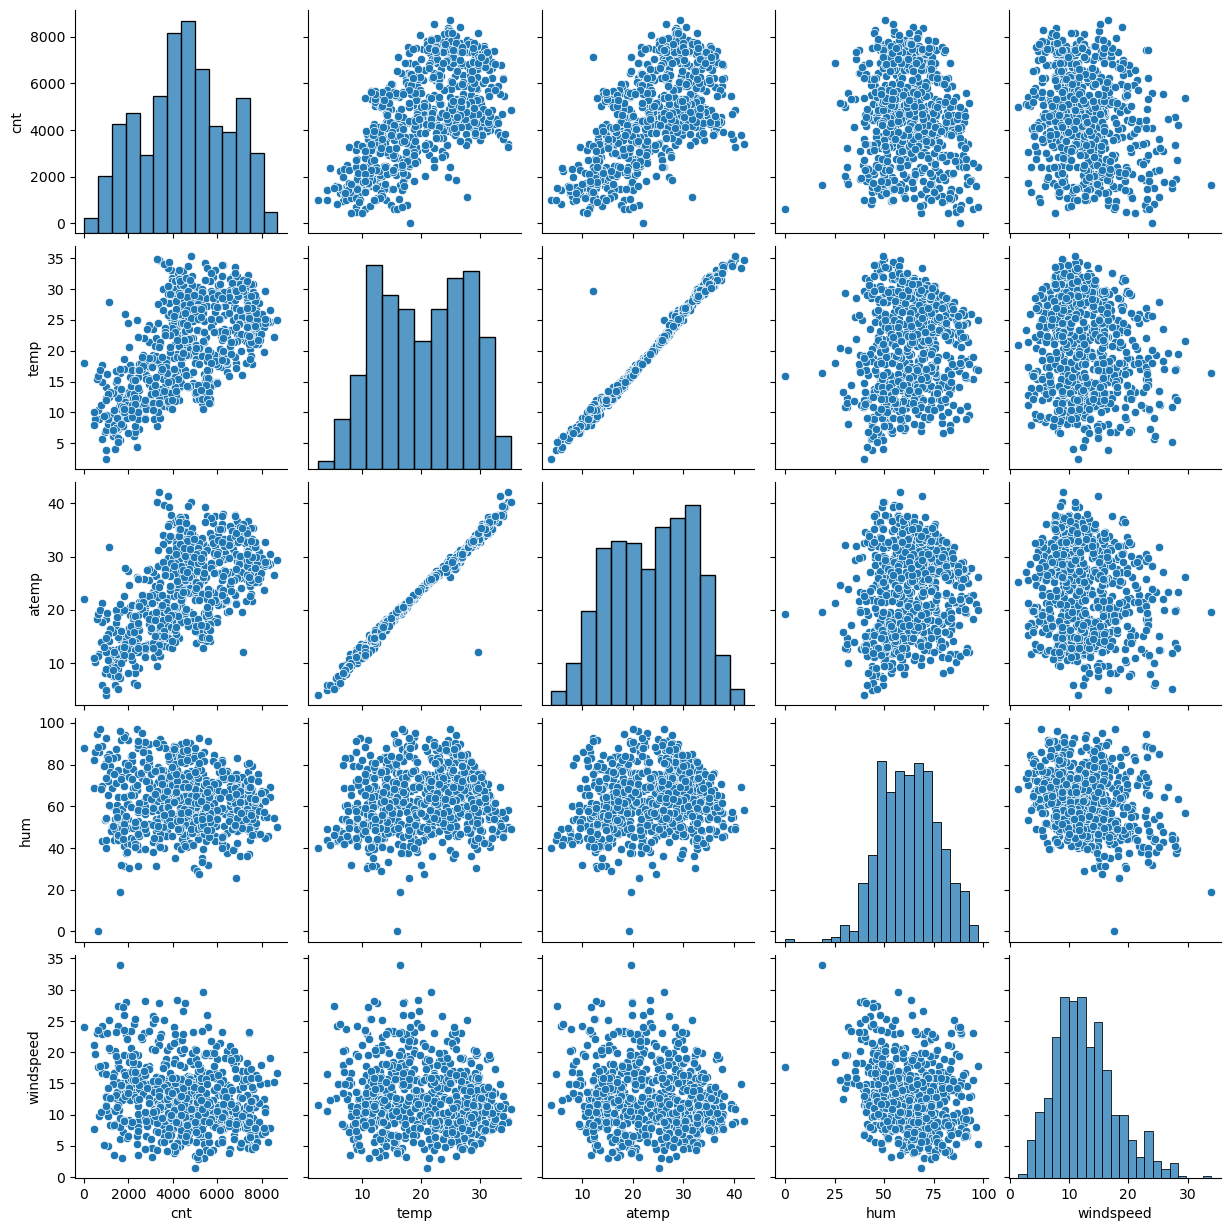

In [674]:
# visualizing continuous numeric variables

data1 = data[['cnt','temp', 'atemp', 'hum', 'windspeed']]
sns.pairplot(data1)
plt.show()

### Analysis

1. There is a positive correlation between temperature and cnt.
2. Also, variables temp and atemp are highly positive correlated.

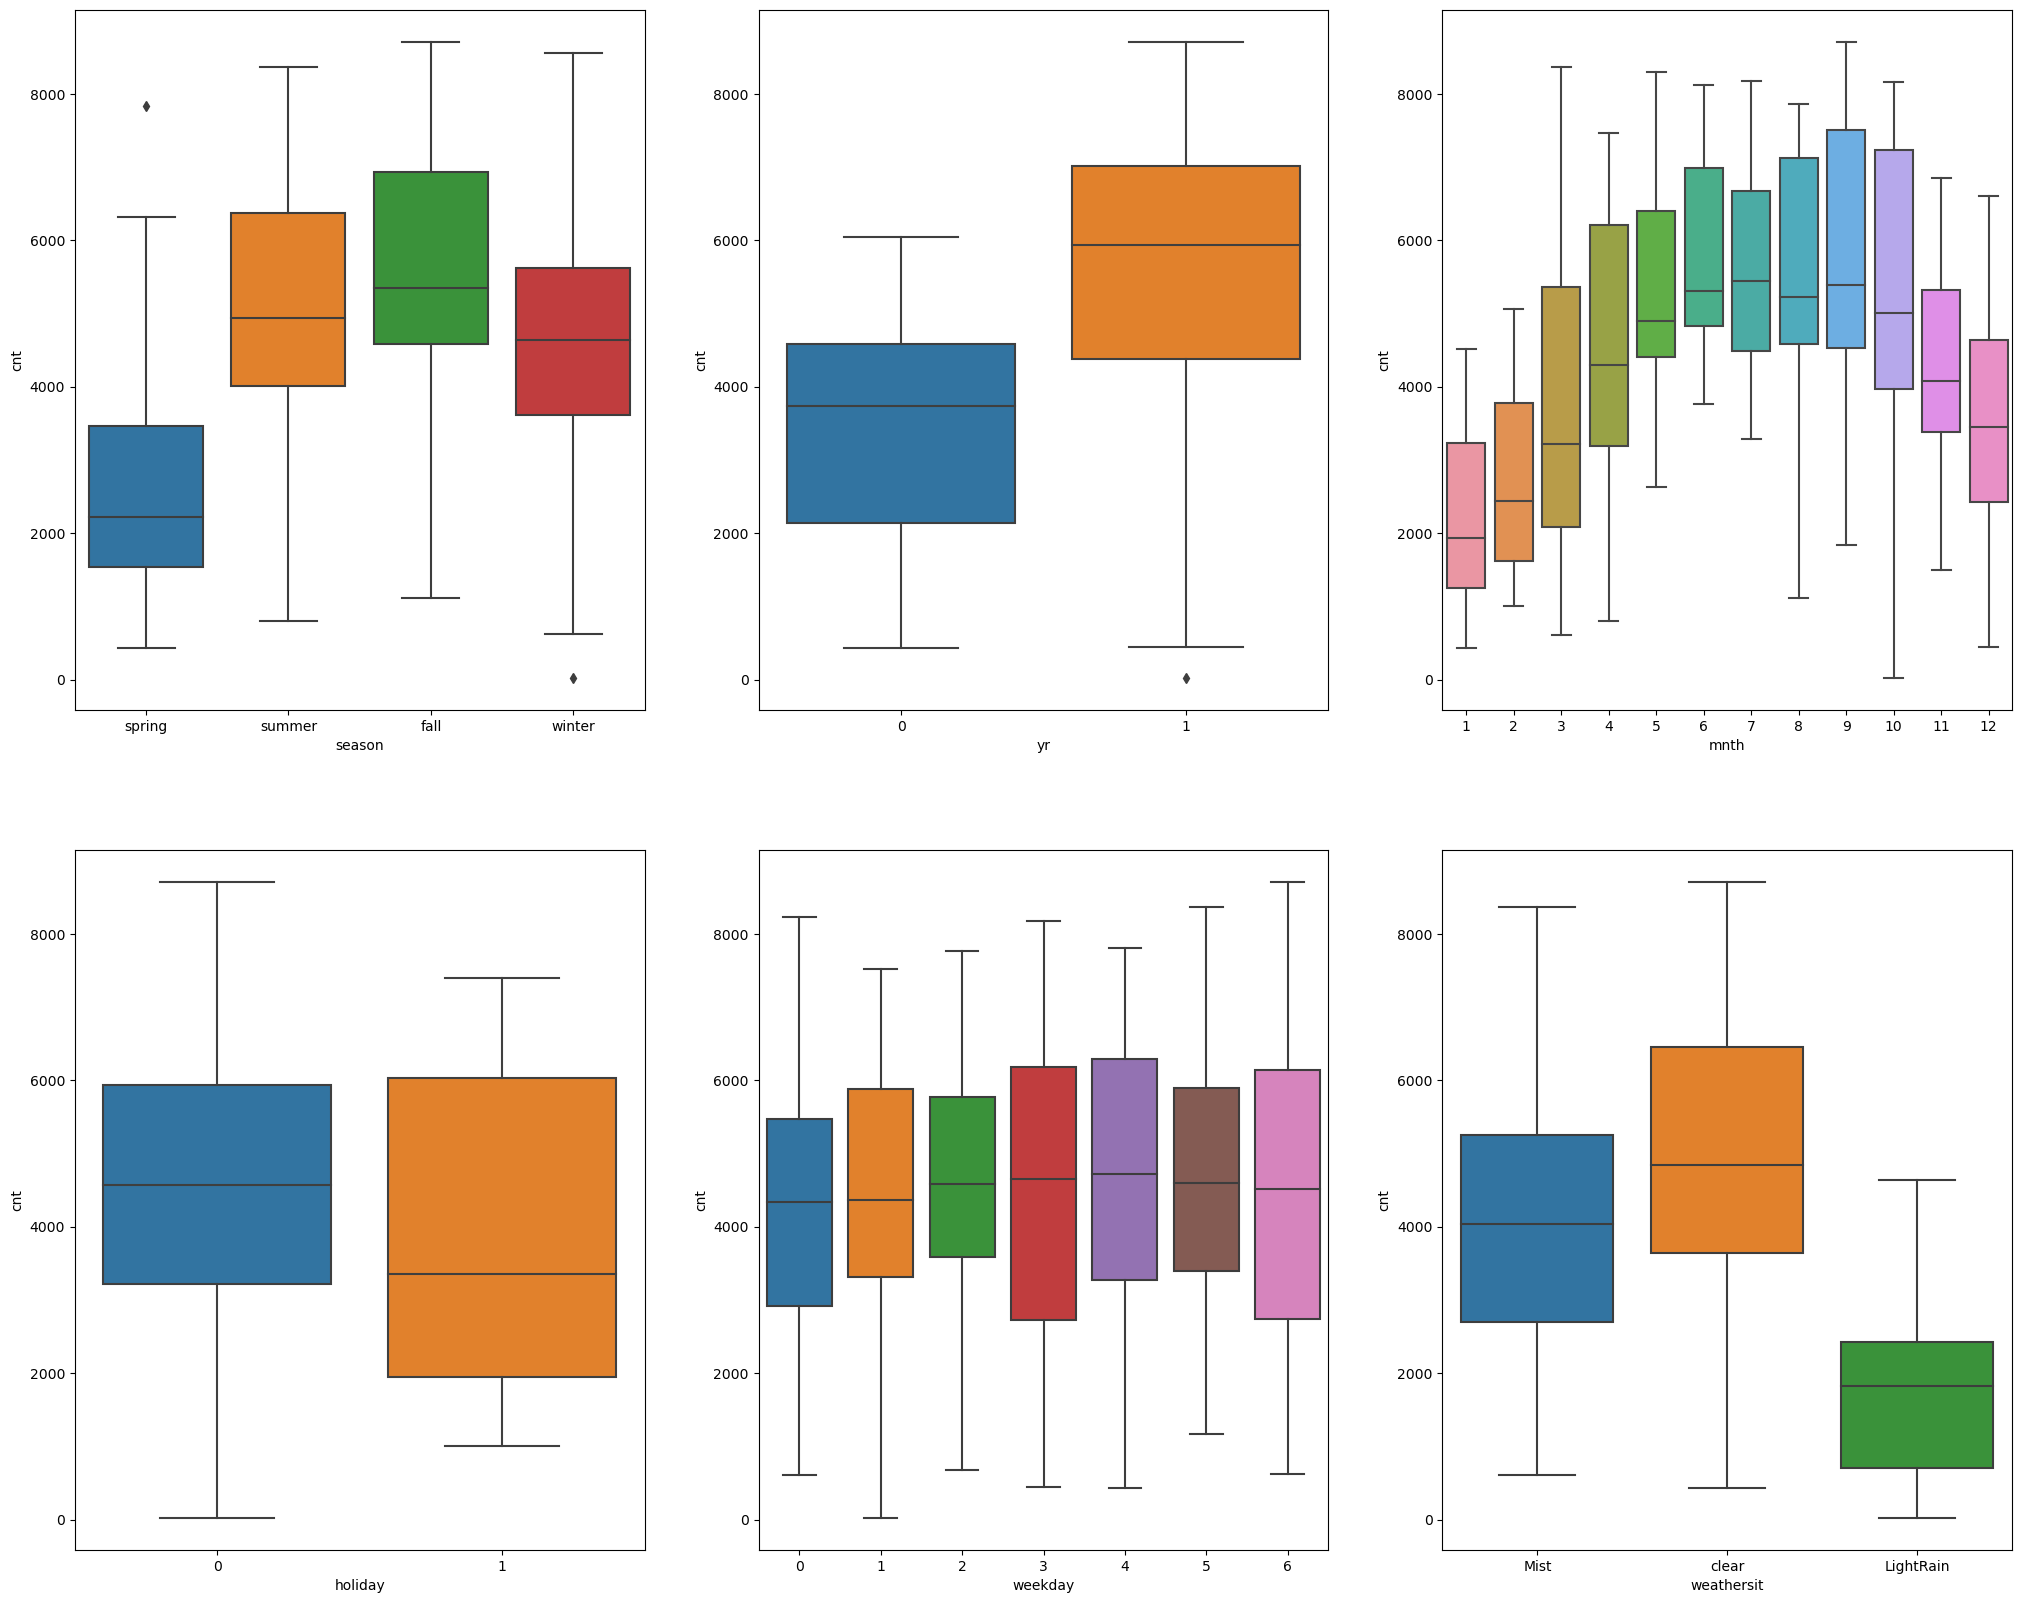

In [675]:
# visualizing categorical variables

plt.figure(figsize=(25, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

### Analysis

1. For season variable, the bike demand is least in spring and highest in fall. 
2. In 2019,the demand was much higher than 2018. The maximum demand in 2018 is almost equal to 50% quantile for 2019.
3. In Jan, Feb, Nov and December, the demand was comparatively less than rest of the months showing less demand in winter.
4. Weekday does not make much of a difference in demand.
5. In weathersit feature, the demand was least in "lightRain" weather and most in clear weather which is expected behaviour.

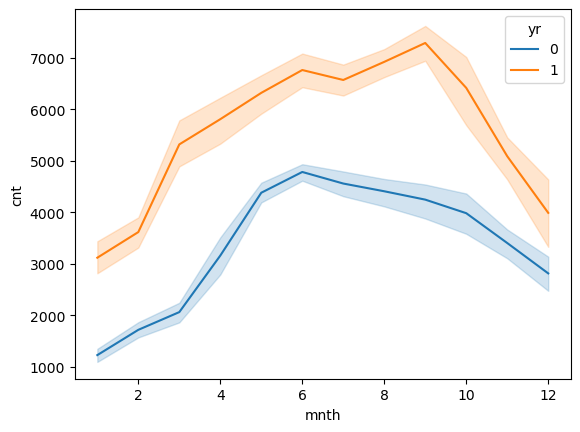

In [676]:
# checking demand in 2018,2019 for different months

sns.lineplot(data=data,x='mnth',y='cnt',hue='yr')
plt.show()

Looking above, the demand increased between August and October in 2019 and declined sharply after that in comparison to 2018. Rest of the pattern seems same.

# Data Preparation

### Encoding Cyclical Features for model training

Many features commonly found in datasets are cyclical in nature. The best example of such a feature is of course time: months, days, weekdays, hours, minutes, seconds etc. are all cyclical in nature.

A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

We can do that using the following transformations:

𝑥𝑠𝑖𝑛=sin(2∗𝜋∗𝑥max(𝑥))

𝑥𝑐𝑜𝑠=cos(2∗𝜋∗𝑥max(𝑥))

In [677]:
# creating function to encode the mnth and weekday columns to sine and cosine.
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [678]:
# encoding month
data = encode(data,'mnth',12)

In [679]:
# encoding weekday. Giving 6 as max_value because max is 6 in weekday
data = encode(data,'weekday',6)

In [680]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnth_sin,mnth_cos,weekday_sin,weekday_cos
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0.5,0.866025,-2.449294e-16,1.0
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,0.5,0.866025,0.000000e+00,1.0
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,0.5,0.866025,8.660254e-01,0.5
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,0.5,0.866025,8.660254e-01,-0.5
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,0.5,0.866025,1.224647e-16,-1.0


### Dummy variables

Now for categorical variables, "season" and "weathersit", we can encode them using dummy variables.

In [681]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 's'
s = pd.get_dummies(data['season'],drop_first=True)

In [682]:
s.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [683]:
# Add the results to the original dataframe
data = pd.concat([data, s], axis = 1)

In [684]:
# creating dummy variables for the feature 'weathersit' and concatinating to main dataframe.
w = pd.get_dummies(data['weathersit'],drop_first=True)
data = pd.concat([data, w], axis = 1)

In [685]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,cnt,mnth_sin,mnth_cos,weekday_sin,weekday_cos,spring,summer,winter,Mist,clear
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,...,985,0.5,0.866025,-2.449294e-16,1.0,1,0,0,1,0
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,...,801,0.5,0.866025,0.000000e+00,1.0,1,0,0,1,0
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,...,1349,0.5,0.866025,8.660254e-01,0.5,1,0,0,0,1
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,...,1562,0.5,0.866025,8.660254e-01,-0.5,1,0,0,0,1
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,...,1600,0.5,0.866025,1.224647e-16,-1.0,1,0,0,0,1


In [686]:
# dropping columns that were encoded above.
data.drop(["season","mnth","weekday","weathersit"],axis=1,inplace=True)

In [687]:
# getting last five rows of dataframe.
data.tail()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_sin,mnth_cos,weekday_sin,weekday_cos,spring,summer,winter,Mist,clear
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,-2.449294e-16,1.0,-8.660254e-01,-0.5,1,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,-2.449294e-16,1.0,-8.660254e-01,0.5,1,0,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,-2.449294e-16,1.0,-2.449294e-16,1.0,1,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,-2.449294e-16,1.0,0.000000e+00,1.0,1,0,0,0,1
729,1,0,1,8.849153,11.17435,57.7500,10.374682,2729,-2.449294e-16,1.0,8.660254e-01,0.5,1,0,0,1,0


# Splitting data into Training and Test Sets

In [688]:
from sklearn.model_selection import train_test_split

# We specify random so that the train and test data set always have the same rows, respectively after splitting.
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features

We will now perform min-max scaling on "temp","atemp","hum","windspeed" and "cnt" features.

In [689]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to "temp","atemp","hum" and "windspeed" features.
num_vars = ['temp', 'atemp', 'hum', "windspeed","cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [690]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_sin,mnth_cos,weekday_sin,weekday_cos,spring,summer,winter,Mist,clear
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,-8.660254e-01,5.000000e-01,8.660254e-01,-0.5,0,0,1,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,-5.000000e-01,-8.660254e-01,8.660254e-01,-0.5,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1.000000e+00,6.123234e-17,-2.449294e-16,1.0,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,-2.449294e-16,1.000000e+00,0.000000e+00,1.0,1,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,8.660254e-01,-5.000000e-01,-2.449294e-16,1.0,0,1,0,1,0


In [691]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_sin,mnth_cos,weekday_sin,weekday_cos,spring,summer,winter,Mist,clear
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,-9.714672e-03,1.090623e-02,0.018679,0.146078,0.243137,0.245098,0.24902,0.343137,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,7.132645e-01,7.021429e-01,0.638595,0.756591,0.429398,0.430568,0.43287,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-0.866025,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,-8.660254e-01,-5.000000e-01,-0.866025,-0.500000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,-2.449294e-16,6.123234e-17,0.000000,0.500000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,5.000000e-01,8.660254e-01,0.866025,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,0.866025,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


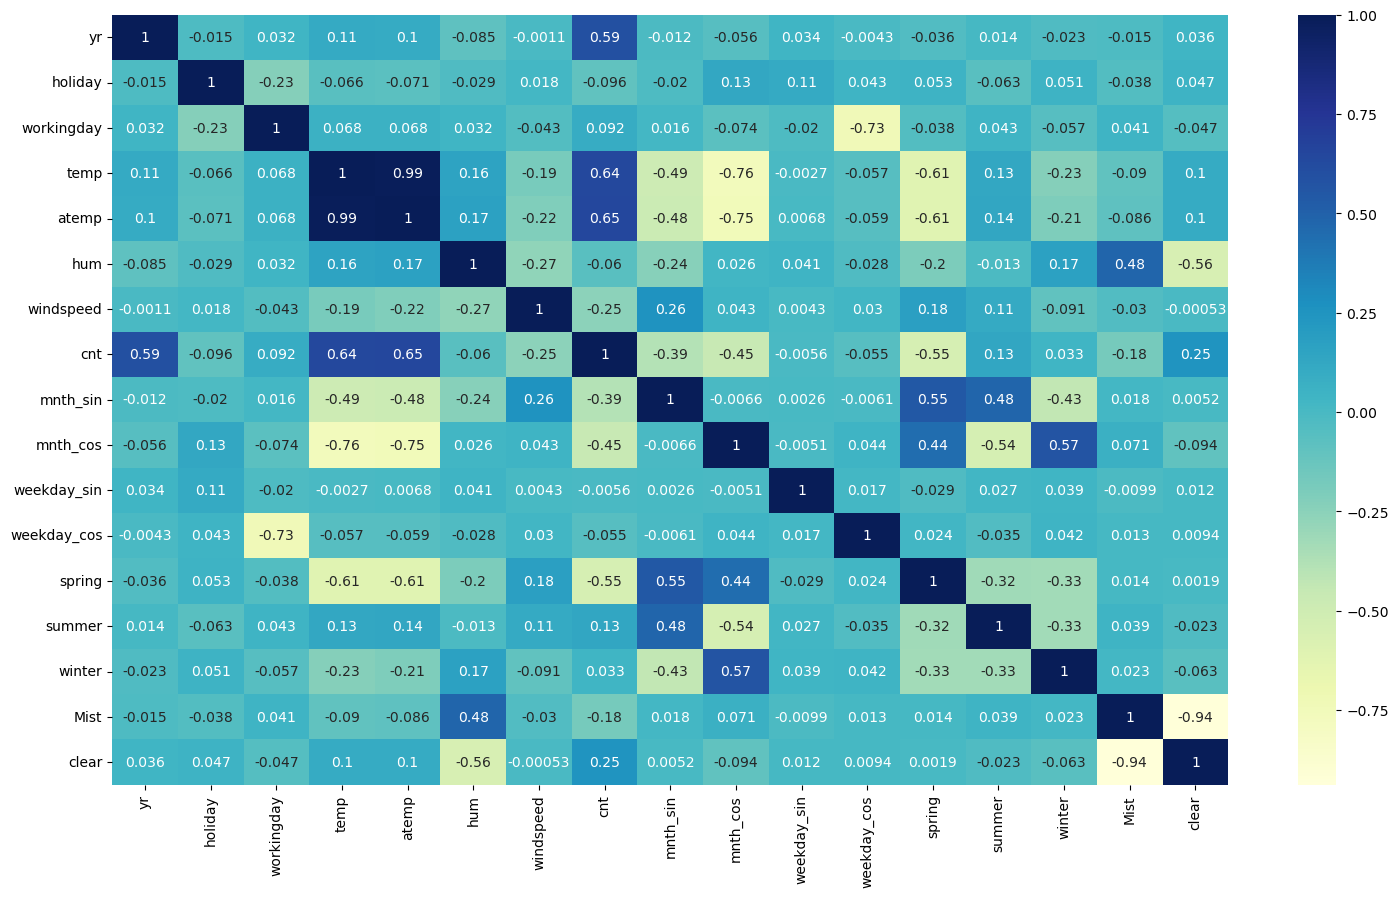

In [692]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (18, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Analysis

1. "cnt" variable seems to have good correlation with "temp", "atemp" and "yr". 
2. "temp" and "atemp" have 0.99 correlation between the two.

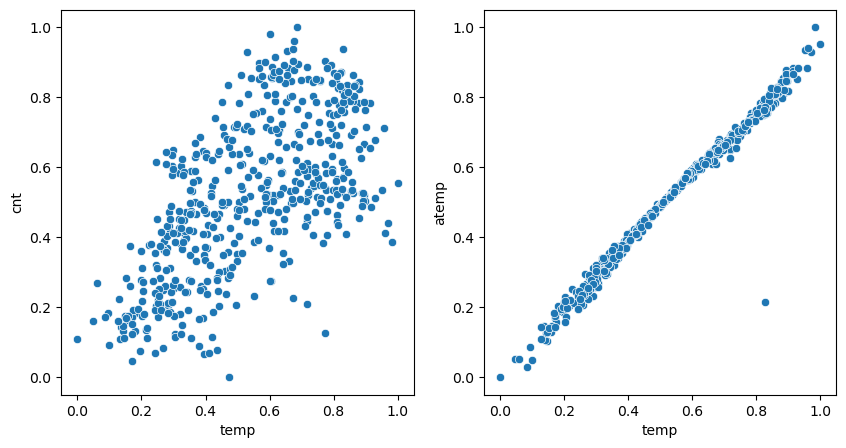

In [693]:
# creating scatterplot for cnt vs temp, temp vs atemp.
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(data = df_train, x=df_train.temp, y=df_train.cnt)
plt.subplot(1,2,2)
sns.scatterplot(data = df_train, x=df_train.temp, y=df_train.atemp)
plt.show()

## Dividing into X and Y sets for the model building

In [694]:
# taking only cnt column in y_train and rest of the dataframe as X_train
y_train = df_train.pop('cnt')
X_train = df_train

# Building Model

### First applying RFE and choosing best 10 features

In [695]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [696]:
# Running RFE with the number of features to select equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

In [697]:
#variables in top 10 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_sin', False, 3),
 ('mnth_cos', False, 5),
 ('weekday_sin', False, 6),
 ('weekday_cos', False, 7),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mist', True, 1),
 ('clear', True, 1)]

In [698]:
# columns that were selected in top 10
cols = X_train.columns[rfe.support_]
print(cols)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Mist', 'clear'],
      dtype='object')


In [699]:
# checking which columns are rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_sin', 'mnth_cos', 'weekday_sin',
       'weekday_cos'],
      dtype='object')

============================

From above, we can see that columns 'workingday', 'atemp', 'mnth_sin', 'mnth_cos', 'weekday_sin','weekday_cos' are removed by RFE. Hence, we will drop these columns.

## Building model using statsmodel.

In [700]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [701]:
# Adding a constant variable for statsmodels training
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [702]:
lm_1st = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [703]:
#Let's see the summary of our linear model
print(lm_1st.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          4.78e-183
Time:                        14:24:33   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0515      0.049      1.057      0.2

### Analysis

R-squared comes out to be 0.827 and adj-R-squared to be 0.824. P value is not that significant for any variable. 

## Checking VIF

In [704]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [705]:
# Creating a function to calculate VIF
def VIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [706]:
# calculating VIF for 1st iteration
X_train_rfe = X_train[cols]

VIF(X_train_rfe)

,Features,VIF
3,hum,23.69
2,temp,20.14
9,clear,14.01
8,Mist,8.65
5,spring,5.02
4,windspeed,4.60
7,winter,3.63
6,summer,2.53
0,yr,2.09
1,holiday,1.04


### Analysis

We want VIF to be less than 5 for all variables. Hence we need to drop "hum" first and retrain model.

### Dropping "hum" and observing the behavior 

In [707]:
# Dropping "hum" variables

X_train_2nd = X_train_rfe.drop(["hum"], axis = 1)

In [708]:
## Rebuilding model without "hum" variable
import statsmodels.api as sm  
X_train_lm_2nd = sm.add_constant(X_train_2nd)

In [709]:
# 2nd iteration
lm_2nd = sm.OLS(y_train,X_train_lm_2nd).fit()   # Running the linear model

In [710]:
# summary of new model
print(lm_2nd.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.42e-181
Time:                        14:24:43   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0571      0.038     -1.487      0.1

In [711]:
# Calculating VIF for 2nd iteration
VIF(X_train_2nd)

,Features,VIF
8,clear,13.93
2,temp,11.53
7,Mist,7.74
3,windspeed,4.58
4,spring,3.75
6,winter,2.41
5,summer,2.21
0,yr,2.07
1,holiday,1.04


### Analysis

1. We can see that removing "hum" kept the adj R-squared to 0.820.
2. P value of summer has been increased to 0.008 making it big insignificant.
3. VIF of all other features got reduced drastically.

Now we can try removing feature "clear" as it has high VIF


In [712]:
X_train_3rd = X_train_2nd.drop(["clear"], axis = 1)

# Rebuilding model without "clear" variable
import statsmodels.api as sm  
X_train_lm_3rd = sm.add_constant(X_train_3rd)

#3rd iteration
lm_3rd = sm.OLS(y_train,X_train_lm_3rd).fit()   # Running the linear model


In [713]:
# summary of new model
print(lm_3rd.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.27e-159
Time:                        14:24:52   Log-Likelihood:                 425.27
No. Observations:                 510   AIC:                            -832.5
Df Residuals:                     501   BIC:                            -794.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2067      0.033      6.224      0.0

In [714]:
# Calculating VIF for 3rd iteration
VIF(X_train_3rd)

,Features,VIF
3,windspeed,4.53
2,temp,3.56
0,yr,2.06
4,spring,1.96
5,summer,1.79
6,winter,1.59
7,Mist,1.50
1,holiday,1.04


### Analysis

adjusted R square droped and VIF for all features came to be below 5.

Holiday has high P value and it's showing this as insignificant. Hence, we can try removing this feature and perform linear regression again.

In [715]:
X_train_4th = X_train_3rd.drop(["holiday"], axis = 1)

## Rebuilding model without "holiday" variable
import statsmodels.api as sm  
X_train_lm_4th = sm.add_constant(X_train_4th)

#4rd iteration
lm_4th = sm.OLS(y_train,X_train_lm_4th).fit()   # Running the linear model

In [716]:
# summary of new model
print(lm_4th.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     251.0
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.77e-159
Time:                        14:25:07   Log-Likelihood:                 422.07
No. Observations:                 510   AIC:                            -828.1
Df Residuals:                     502   BIC:                            -794.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2044      0.033      6.125      0.0

In [717]:
# Calculating VIF for 4th iteration
VIF(X_train_4th)

,Features,VIF
2,windspeed,4.53
1,temp,3.55
0,yr,2.06
3,spring,1.94
4,summer,1.79
5,winter,1.58
6,Mist,1.50


1. After this iteration, we can see that the adjusted R square became 0.775 and the P values for all decreased below or equal to 0.005 hence making them significant.
2. The VIF gets below 5 for all other features hence it's good from that end.

### Analysis

Hence, we will take the features from 4th iteration i.e "windspeed", "temp" , "yr", "spring", "summer", "winter" and "mist" as final features.

## Final Features selected
windspeed, temp , yr, spring, Mist, winter and summer

## Residual analysis

In [718]:
# let us plot the histogram of the error terms and see what it looks like with linear model for 4th iteration.
y_train_price = lm_4th.predict(X_train_lm_4th)

/tmp/ipykernel_8318/282277005.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 25)


Text(0.5, 0, 'Errors')

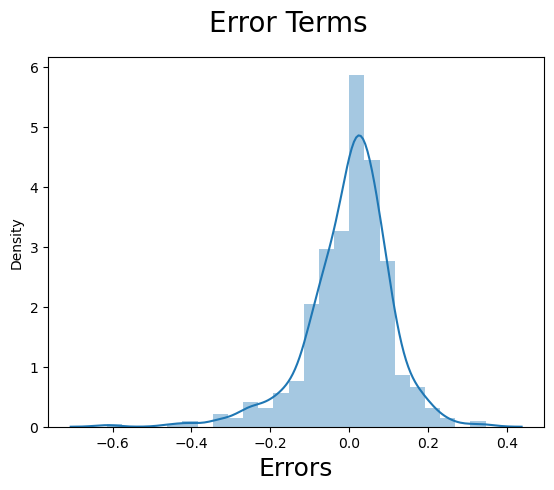

In [719]:
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 25)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms follow normalized conditions and have mean close to 0. This shows that the errors follow normal distribution.

## Homoscedasticity

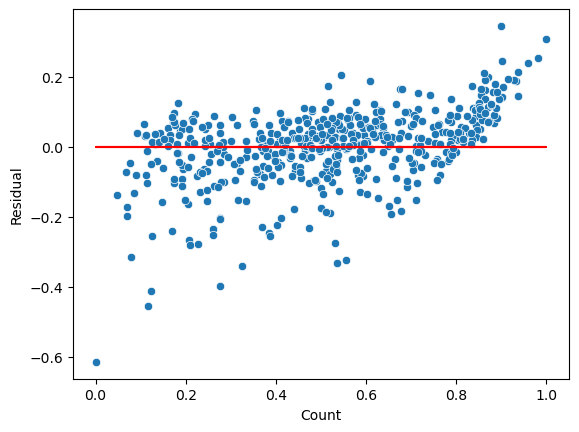

In [720]:
# plotting graph to check Homoscedasticity with residual vs y_train.
y_train_pred = lm_4th.predict(X_train_lm_4th)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

The residuals are distributed evenly above and below the 0 residual so the model is trained correctly.

## Autocorrelation

The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical model or regression analysis. The Durbin-Watson statistic will always have a value ranging between 0 and 4. A value of 2.0 indicates there is no autocorrelation detected in the sample. Values from 0 to less than 2 point to positive autocorrelation and values from 2 to 4 means negative autocorrelation. 

The value for Durbin Watson (DW) statistic in lr_4 model that we chose is 1.990 hence there is no autocorrelation between the variables.

# Making Predictions

In [721]:
# Applying scaling on test sets
cols_val = ['temp', 'atemp', 'hum', "windspeed","cnt"]

# here we are just transforming the variables from the scaler we trained with training data.
df_test[cols_val] = scaler.transform(df_test[cols_val])

In [722]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_sin,mnth_cos,weekday_sin,weekday_cos,spring,summer,winter,Mist,clear
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02,2.190000e+02,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,4.686207e-03,-2.874077e-02,-0.043499,0.152968,0.255708,0.264840,0.232877,0.319635,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,6.923408e-01,7.241544e-01,0.690152,0.709133,0.437258,0.442259,0.423633,0.467403,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,-1.000000e+00,-1.000000e+00,-0.866025,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,-5.000000e-01,-8.660254e-01,-0.866025,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,1.224647e-16,-1.836970e-16,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,5.000000e-01,5.000000e-01,0.866025,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000e+00,1.000000e+00,0.866025,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [723]:
y_test = df_test.pop('cnt')
X_test = df_test

In [724]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
#chosen_cols = ["windspeed", "temp" , "yr", "spring", "Mist","winter","holiday"]

X_test_new = X_test[X_train_4th.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [725]:
# Making predictions from linear model from 4th training iteration
y_pred = lm_4th.predict(X_test_new)

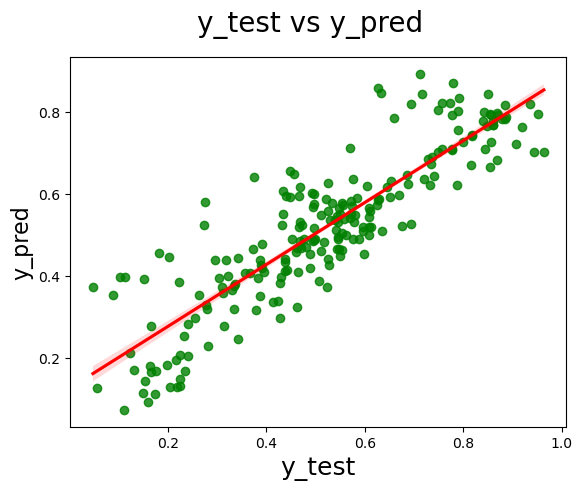

In [726]:
## Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

The datapoints are close to the linear line, hence, the model works well on test data as well.

### Calculating Parameters

In [727]:
# calculating parameters of linear model and rounding to 3 decimals
round(lm_4th.params,3)

const        0.204
yr           0.240
temp         0.480
windspeed   -0.184
spring      -0.073
summer       0.044
winter       0.067
Mist        -0.063
dtype: float64

The linear equation will be like below:

cnt = 0.260 + 0.240 * yr + 0.480 * temp - 0.184 * windspeed - 0.073 * spring + 0.044 * summer + 0.067 * Winter - 0.063* Mist

## Calculating R squared for test set

In [728]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)
round(r2,3)

0.771

## Calculating adjusted R squared for test set

Formula = 1-(1-r2)*(n-1)/(n-p-1)

Where n is the sample size and p is the number of independent variables.

In [729]:
# calculating n and p from .shape for X_test_new
X_test_new.shape

(219, 8)

Here the p should be 7 and not 8 as X_test_new contains constant term as well. 
So, for formula:

1. n = 219
2. p = 7
3. r2 = 0.771

In [730]:
adj_r2_test = round(1-(1-0.771)*(219-1)/(219-7-1),3)
print(adj_r2_test)

0.763


## Result

1. Train set R squared: 0.777
2. Train set Adj. R-squared: 0.774
3. Test set R squared: 0.771
4. Test set Adj. R-squared: 0.763

Bikes demand depends on "windspeed", "temp" , "yr", "spring", "Mist","winter" and "summer" variables.